In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fetch data for TSLA, BND, and SPY
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

data = yf.download(tickers, start=start_date, end=end_date)

Failed to get ticker 'BND' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000013680F53410>: Failed to resolve 'fc.yahoo.com' ([Errno 11002] getaddrinfo failed)"))
[                       0%                       ]Failed to get ticker 'TSLA' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000136EF77F3B0>: Failed to resolve 'fc.yahoo.com' ([Errno 11002] getaddrinfo failed)"))
Failed to get ticker 'SPY' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000013680F53050>: Failed to resolve 'fc.yahoo.com' ([Errno 11002] getaddrinfo failed)"))
[*********************100%***********************]  3 of 3 completed

3 Failed 

In [4]:
# Data Cleaning
data.dropna(inplace=True)

In [8]:
data.head()

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358757  173.173782  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542709  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726776  168.444687  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765049  170.543640  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665386  173.569931  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994  14.041333  83.110001  206.160004   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   
2015-01-08 00:00:00+00:00  14.253333  82.970001  203.990005  14.000667   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995  14.187333  1873400   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000  
2015-01-08 00:00:00+00:00  147217800  51637500

In [9]:
# Exploratory Data Analysis (EDA)

In [10]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., fill with mean, median, or interpolate)
data.fillna(method='ffill', inplace=True)

# Explore the data
print(data.head())
print(data.describe())

# Visualize the data
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.legend()
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate daily returns
returns = data['Close'].pct_change()

# Visualize daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker)
plt.legend()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Calculate and visualize volatility
volatility = returns.rolling(window=20).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(volatility[ticker], label=ticker)
plt.legend()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Correlation matrix
corr_matrix = data['Close'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358757  173.173782  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542709  170.046310  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726776  168.444687  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765049  170.543640  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665386 

C:\Users\HP\AppData\Local\Temp\ipykernel_14112\3129158170.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


KeyError: 'TSLA'

<Figure size 1200x600 with 0 Axes>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., fill with mean, median, or interpolate)
data.fillna(method='ffill', inplace=True)

# Check if 'TSLA' is in the columns
if 'TSLA' in data.columns:
    # Explore the data
    print(data.head())
    print(data.describe())

    # Visualize the data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(data[ticker]['Close'], label=ticker)
    plt.legend()
    plt.title('Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    # Calculate daily returns
    returns = data['Close'].pct_change()

    # Visualize daily returns
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(returns[ticker], label=ticker)
    plt.legend()
    plt.title('Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.show()

    # Calculate and visualize volatility
    volatility = returns.rolling(window=20).std() * np.sqrt(252)
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(volatility[ticker], label=ticker)
    plt.legend()
    plt.title('Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.show()

    # Correlation matrix
    corr_matrix = data['Close'].corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.title('Correlation Matrix')
    plt.show()

else:
    print("TSLA is not a column in the data. Please check your data source.")

Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64
TSLA is not a column in the data. Please check your data source.


C:\Users\HP\AppData\Local\Temp\ipykernel_14112\2505999302.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [6]:
# Visualize closing prices
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.legend()
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

KeyError: 'TSLA'

<Figure size 1200x600 with 0 Axes>

In [14]:
# Calculate daily returns
returns = data['Close'].pct_change()

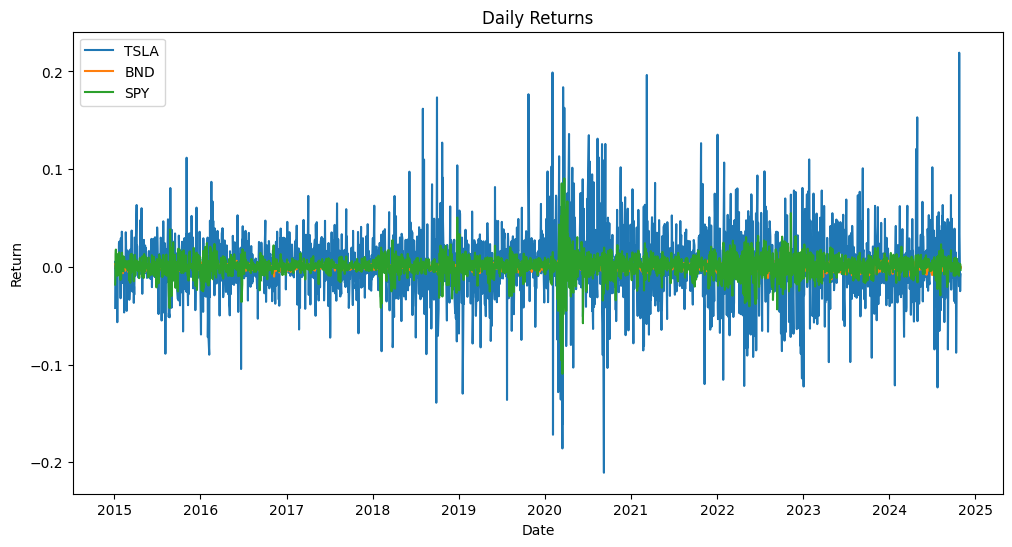

In [15]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker)
plt.legend()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()


In [16]:
# Calculate volatility
volatility = returns.rolling(window=20).std() * np.sqrt(252)

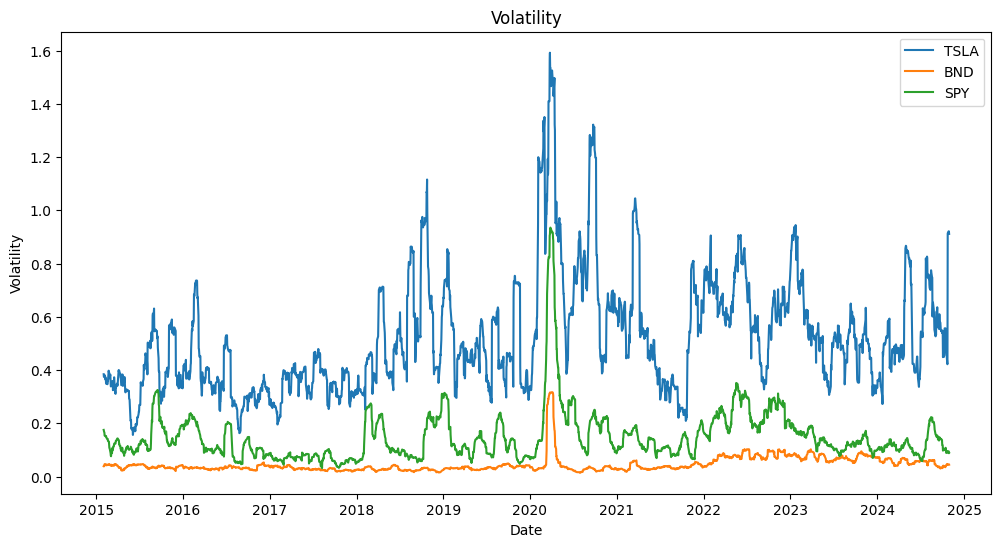

In [17]:
# Visualize volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(volatility[ticker], label=ticker)
plt.legend()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch data for TSLA, BND, and SPY
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

data = yf.download(tickers, start=start_date, end=end_date)

# Data Cleaning
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
# Visualize closing prices
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.legend()
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate daily returns
returns = data['Close'].pct_change()

# Visualize daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker)
plt.legend()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Calculate volatility
volatility = returns.rolling(window=20).std() * np.sqrt(252)

# Visualize volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(volatility[ticker], label=ticker)
plt.legend()
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

[*********************100%***********************]  3 of 3 completed


KeyError: 'TSLA'

<Figure size 1200x600 with 0 Axes>

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'statsmodels'